In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed, randrange
from scipy import stats
%matplotlib inline
seed=1

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


def MSE(y, yh):
     return np.square(y - yh).mean()
def r2score(y,yh):    
    return (1 - np.sum(np.square(y-yh))/np.sum(np.square(y- np.mean(yh))))
def cofidentint(XXinv,y,yh,beta):
    
    N=np.size(y,0)

    p=np.size(XXinv,0)

    confInt=np.zeros((p,2))
    sigma2=np.sum(np.square(y-yh))/(N-p-1)

    for i in range(p):
        confInt[i,0]=beta[i]-1.645*np.sqrt(abs(XXinv[i,i]))*sigma2
        confInt[i,1]=beta[i]+1.645*np.sqrt(abs(XXinv[i,i]))*sigma2
    return confInt
    
def OSLregression(xVector,yVector,zVector,polyOrder):
    
    vectorSize=np.size(yVector,0)
    #transform back to a matrix
    if polyOrder==3:       
        xMatrix = np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector]
    elif polyOrder==4:
        xMatrix= np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector,
                      xVector**4,xVector*(yVector**3),(xVector**3)*yVector,(xVector**2)*(yVector**2),
                       (xVector**3)*yVector,yVector**4,
                       (xVector**2)*(yVector**2),xVector*(yVector**3)]
    elif polyOrder==5:
        xMatrix=np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector,
                      xVector**4,xVector*(yVector**3),(xVector**3)*yVector,(xVector**2)*(yVector**2),
                       (xVector**3)*yVector,yVector**4,
                       (xVector**2)*(yVector**2),xVector*(yVector**3),
                      xVector**5,(xVector**2)*(yVector**3),(xVector**4)*yVector,(xVector**3)*(yVector**2),
                       (xVector**4)*yVector,xVector*(yVector**4),
                       (xVector**3)*(yVector**2),(xVector**2)*(yVector**3),
                     xVector**4*yVector,xVector*(yVector**4),(xVector**3)*(yVector**2),(xVector**2)*(yVector**3),
                       (xVector**3)*(yVector**2),yVector**5,
                       (xVector**2)*(yVector**3),xVector*(yVector**4)]
    #pseudo inversion using SVD   
    XXinv=np.linalg.pinv(xMatrix.T.dot(xMatrix))
    beta = XXinv.dot(xMatrix.T).dot(zVector)
    #print(beta)
    #zPredict=xMatrix.dot(beta)
    #zPredictReshape=np.reshape(zPredict,(10,10))
    return beta,XXinv

def Ridgeregression(xVector,yVector,zVector,polyOrder,lambda1):
    
    vectorSize=np.size(yVector,0)

    #transform back to a matrix
    #
    if polyOrder==3:       
        xMatrix = np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector]
    elif polyOrder==4:
        xMatrix= np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector,
                      xVector**4,xVector*(yVector**3),(xVector**3)*yVector,(xVector**2)*(yVector**2),
                       (xVector**3)*yVector,yVector**4,
                       (xVector**2)*(yVector**2),xVector*(yVector**3)]
    elif polyOrder==5:
        xMatrix=np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector,
                      xVector**4,xVector*(yVector**3),(xVector**3)*yVector,(xVector**2)*(yVector**2),
                       (xVector**3)*yVector,yVector**4,
                       (xVector**2)*(yVector**2),xVector*(yVector**3),
                      xVector**5,(xVector**2)*(yVector**3),(xVector**4)*yVector,(xVector**3)*(yVector**2),
                       (xVector**4)*yVector,xVector*(yVector**4),
                       (xVector**3)*(yVector**2),(xVector**2)*(yVector**3),
                     xVector**4*yVector,xVector*(yVector**4),(xVector**3)*(yVector**2),(xVector**2)*(yVector**3),
                       (xVector**3)*(yVector**2),yVector**5,
                       (xVector**2)*(yVector**3),xVector*(yVector**4)]
    size1=np.size(xMatrix,1)
    I=np.identity(size1)
    #pseudo inversion using SVD
    XXinv=np.linalg.pinv(xMatrix.T.dot(xMatrix)+ lambda1*I)
    beta = XXinv.dot(xMatrix.T).dot(zVector)
    #print(beta)
    #zPredict=xMatrix.dot(beta)
    #zPredictReshape=np.reshape(zPredict,(10,10))
    return beta,XXinv

def computeZpredict(xVector,yVector,beta,polyOrder):
    #
    vectorSize=np.size(yVector,0)
    
    if polyOrder==3:       
        xMatrix = np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector]
    elif polyOrder==4:
        xMatrix= np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector,
                      xVector**4,xVector*(yVector**3),(xVector**3)*yVector,(xVector**2)*(yVector**2),
                       (xVector**3)*yVector,yVector**4,
                       (xVector**2)*(yVector**2),xVector*(yVector**3)]
    elif polyOrder==5:
        xMatrix=np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector,
                      xVector**4,xVector*(yVector**3),(xVector**3)*yVector,(xVector**2)*(yVector**2),
                       (xVector**3)*yVector,yVector**4,
                       (xVector**2)*(yVector**2),xVector*(yVector**3),
                      xVector**5,(xVector**2)*(yVector**3),(xVector**4)*yVector,(xVector**3)*(yVector**2),
                       (xVector**4)*yVector,xVector*(yVector**4),
                       (xVector**3)*(yVector**2),(xVector**2)*(yVector**3),
                     xVector**4*yVector,xVector*(yVector**4),(xVector**3)*(yVector**2),(xVector**2)*(yVector**3),
                       (xVector**3)*(yVector**2),yVector**5,
                       (xVector**2)*(yVector**3),xVector*(yVector**4)]
    zPredict=xMatrix.dot(beta)
    return zPredict

def plotTheSurface(x,y,z):
# Plot the surface.
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')


    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Z')
    #plt.show();
    return fig

def train_test_split(dataset, split):
    # Split a dataset into a train and test set
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        #print(index)
        train.append(dataset_copy.pop(index))
    #tranform into np.array
    train=np.array(train)
    dataset_copy=np.array(dataset_copy)
    return train, dataset_copy



    
def k_folds_CV(dataset, nfolds):
    # Split a dataset into k folds
    splitedDataset = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / nfolds)
    for i in range(nfolds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        splitedDataset.append(fold)
    return splitedDataset

def trainSetindex(indeces,testSetindex):
    #given indeces of the test set, find the indeces of the train set
    size=np.size(indeces)
    mask = np.ones(size, dtype=bool)
    mask[testSetindex] = False
    return indeces[mask]
def computeBiasandVar(zPredictmatrix,zVector):
    n=np.size(zPredictmatrix,0)
    m=np.size(zPredictmatrix,1)
    meanzPredictmatrix=np.mean(zPredictmatrix,1)
    bias=np.sum(np.square(zVector-meanzPredictmatrix))
    newMatrix=np.zeros((n,m))
    for i in range(m-1):
        newMatrix[:,i]=zPredictmatrix[:,i]-meanzPredictmatrix
    newMatrix=np.square(newMatrix)
    newMatrix=np.mean(newMatrix)
    var=np.sum(newMatrix,0)
    return bias,var

def constructX(xVector,yVector,polyOrder):
    
    vectorSize=np.size(yVector,0)
    if polyOrder==3:       
        xMatrix = np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector]
    elif polyOrder==4:
        xMatrix= np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector,
                      xVector**4,xVector*(yVector**3),(xVector**3)*yVector,(xVector**2)*(yVector**2),
                       (xVector**3)*yVector,yVector**4,
                       (xVector**2)*(yVector**2),xVector*(yVector**3)]
    elif polyOrder==5:
        xMatrix=np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector,
                      xVector**4,xVector*(yVector**3),(xVector**3)*yVector,(xVector**2)*(yVector**2),
                       (xVector**3)*yVector,yVector**4,
                       (xVector**2)*(yVector**2),xVector*(yVector**3),
                      xVector**5,(xVector**2)*(yVector**3),(xVector**4)*yVector,(xVector**3)*(yVector**2),
                       (xVector**4)*yVector,xVector*(yVector**4),
                       (xVector**3)*(yVector**2),(xVector**2)*(yVector**3),
                     xVector**4*yVector,xVector*(yVector**4),(xVector**3)*(yVector**2),(xVector**2)*(yVector**3),
                       (xVector**3)*(yVector**2),yVector**5,
                       (xVector**2)*(yVector**3),xVector*(yVector**4)]

    return xMatrix

IndentationError: unexpected indent (<ipython-input-15-853c4e411736>, line 149)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


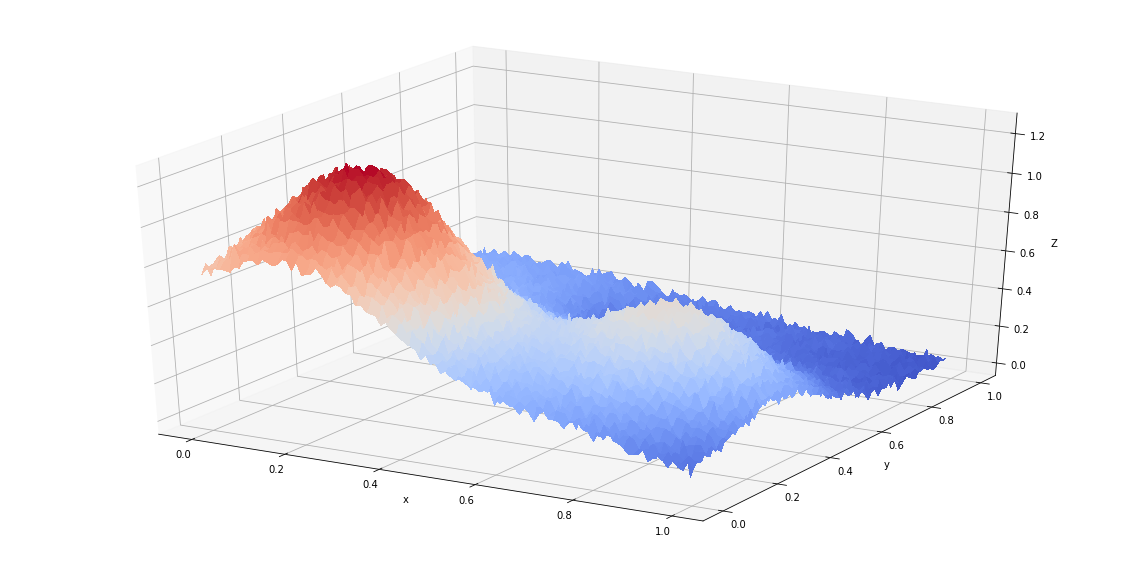

In [16]:
x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
#x = np.random.rand(100,1)
#y = np.random.rand(100,1)
#print(x)
#print(y)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y) +0.02*np.random.randn(100,100)
fig=plotTheSurface(x,y,z)
fig.show()
fig.savefig('Franke.png',DPI=(200))


#OSL regression




In [3]:
#transforming to a coluum vector in order to form an x_hat matrix
xVector=np.matrix.flatten(x)
yVector=np.matrix.flatten(y)
#vectorSize=np.size(yVector,0)
zVector=np.matrix.flatten(z)
#print(np.size(y,1))
#transform back to a matrix
#yReshape=np.reshape(y,(100,100))
#beta,XXinv=OSLregression(xVector,yVector,zVector,3)
#zPredict=computeZpredict(xVector,yVector,beta,3)

#zPredictReshape=np.reshape(zPredict,(100,100))

In [4]:
matrixSize=np.size(y,0)
#zPredictReshape=np.reshape(zPredict,(matrixSize,matrixSize))
#plotTheSurface(x,y,zPredictReshape)

In [ ]:

print(MSE(zVector,zPredict))
print(r2score(zVector,zPredict))
print(cofidentint(XXinv,zVector,zPredict,beta))

In [ ]:
beta,XXinv=Ridgeregression(xVector,yVector,zVector,3,1)
zPredict=computeZpredict(xVector,yVector,beta,3)
print(MSE(zVector,zPredict))
print(r2score(zVector,zPredict))
print(cofidentint(XXinv,zVector,zPredict,beta))


In [ ]:
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(zPredict,(matrixSize,matrixSize))
plotTheSurface(x,y,zPredictReshape)

In [ ]:

#dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
sizeVector=np.size(zVector)
train, test = train_test_split(np.linspace(0,sizeVector-1,sizeVector),0.5)
train=train.astype(int)
test=test.astype(int)
print(train)
print(test)

In [ ]:
#xVector[train]
#xVector[test]
beta,XXinv=Ridgeregression(xVector[train],yVector[train],zVector[train],3,0.1)
zPredict=computeZpredict(xVector[test],yVector[test],beta,3)
print(MSE(zVector[test],zPredict))
print(r2score(zVector[test],zPredict))
#print(cofidentint(XXinv,zVector[train],zPredict[train],beta))



In [5]:
sizeVector=np.size(zVector)
#print(sizeVector)

In [6]:


 
# test cross validation split

#dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
indeces=np.linspace(0,sizeVector-1,sizeVector)
indeces=indeces.astype(int)
numberOfFolds=10
folds = k_folds_CV(indeces, numberOfFolds)
#print(folds[0])
#test1=folds[0]
#train1= trainSetindex(indeces,test1)
#print(train1)

In [7]:
#OLS Model
polynom_oders=[3,4,5]
numOfoders=len(polynom_oders)
statsMatrix=np.zeros((2,numberOfFolds,numOfoders))
zPredictmatrix=np.zeros((sizeVector,numberOfFolds,numOfoders))
for j,order in enumerate(polynom_oders):
    for i in range(numberOfFolds):
        #print(i)
    
        test1=folds[i]
        train1= trainSetindex(indeces,test1)
        beta,XXinv=OSLregression(xVector[train1],yVector[train1],zVector[train1],order)
    #zPredict=computeZpredict(xVector[test1],yVector[test1],beta,3)
        zPredictmatrix[:,i,j]=computeZpredict(xVector,yVector,beta,order)
        statsMatrix[0,i,j]=MSE(zVector[test1],zPredictmatrix[test1,i,j])
        statsMatrix[1,i,j]=r2score(zVector[test1],zPredictmatrix[test1,i,j])
    print('STATS of MSE for polynom order {} is:'.format(str(order)))
    print(stats.describe(statsMatrix[0,:,j]))
    print('STATS of R2score for polynom order {} is:'.format(str(order)))
    print(stats.describe(statsMatrix[1,:,j]))
    print('\n')


STATS of MSE for polynom order 3 is:
DescribeResult(nobs=10, minmax=(0.007785267546300954, 0.008550516261068737), mean=0.008123495526849104, variance=9.808834282118725e-08, skewness=0.16009187151429152, kurtosis=-1.6572397868568889)
STATS of R2score for polynom order 3 is:
DescribeResult(nobs=10, minmax=(0.8974561217197813, 0.906715981147199), mean=0.9019144700615952, variance=1.0286063266794587e-05, skewness=0.05135996803445662, kurtosis=-1.3552876472859232)


STATS of MSE for polynom order 4 is:
DescribeResult(nobs=10, minmax=(0.0039691751800143334, 0.0047146722812226784), mean=0.00438190022190556, variance=5.965766923621234e-08, skewness=-0.24858900140572243, kurtosis=-1.0271329243260576)
STATS of R2score for polynom order 4 is:
DescribeResult(nobs=10, minmax=(0.9443676128926901, 0.9525100780234685), mean=0.9470931462389499, variance=6.066375945075618e-06, skewness=0.8666269599498911, kurtosis=0.3639047599642491)


STATS of MSE for polynom order 5 is:
DescribeResult(nobs=10, minmax=

Bias^2 for the final model is: 24.673278696029104
Var for the final model is: 8.228004037775138e-07


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


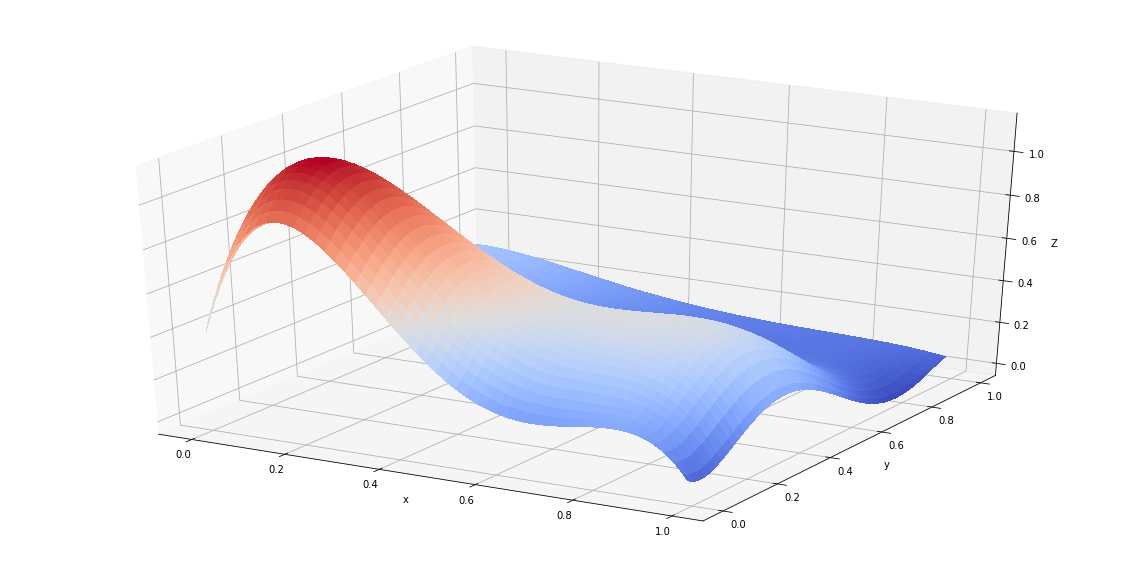

In [8]:
#final OLS model
# bias and var Only for the best model
bias,var=computeBiasandVar(zPredictmatrix[:,:,2],zVector)
print('Bias^2 for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))
z_pred=np.mean(zPredictmatrix[:,:,2],1)
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
fig1=plotTheSurface(x,y,zPredictReshape)
fig1.show()
fig1.savefig('olsFranke.png')


In [ ]:
vectorSize=np.size(yVector,0)
xMatrix = np.c_[np.ones((vectorSize,1)), xVector, yVector,xVector**2,yVector**2,xVector*yVector,
                   xVector**3,yVector**3,(xVector**2)*yVector,(yVector**2)*xVector]
#U, s, VT = np.linalg.svd(xMatrix)
# create m x n Sigma matrix
#Sigma = np.zeros((xMatrix.shape[0], xMatrix.shape[1]))
# populate Sigma with n x n diagonal matrix
#Sigma[:xMatrix.shape[1], :xMatrix.shape[1]] = np.diag(s)
# reconstruct matrix
#B = U.dot(Sigma.dot(VT))


In [ ]:
zz=U.dot(np.transpose(U).dot(zVector))
print(zz-zVector)

In [ ]:
print(MSE(zVector,zPredict))
print(r2score(zVector,zPredict))
print(cofidentint(XXinv,zVector,zPredict,beta))

In [ ]:
print(MSE(zVector,zz))
print(r2score(zVector,zz))
print(cofidentint(XXinv,zVector,zz,beta))

In [ ]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.0001,normalize=True)
lassoreg.fit(xMatrix,zVector)
z_pred = lassoreg.predict(xMatrix)

In [ ]:
print(MSE(zVector,z_pred))
print(r2score(zVector,z_pred))
#print(cofidentint(XXinv,zVector,zPredict,beta))

In [ ]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0,normalize=True)
ridgereg.fit(xMatrix,zVector)
z_pred = ridgereg.predict(xMatrix)
print(MSE(zVector,z_pred))
print(r2score(zVector,z_pred))

In [9]:

#Ridge Model
lambda_values=[1e-3,1e-2,1e-1,1,10,1e2]
numOfLambdas=len(lambda_values)
polynom_oders=[3,4,5]
numOfoders=len(polynom_oders)
statsMatrix=np.zeros((2,numberOfFolds,numOfLambdas,numOfoders))
zPredictmatrix=np.zeros((sizeVector,numberOfFolds,numOfLambdas,numOfoders))
for j,order in enumerate(polynom_oders):
    for i in range(numberOfFolds):
        #print(i)
        test1=folds[i]
        train1= trainSetindex(indeces,test1)
        for  h,lbd in enumerate(lambda_values):           
            beta,XXinv=Ridgeregression(xVector[train1],yVector[train1],zVector[train1],order,lbd)
    #zPredict=computeZpredict(xVector[test1],yVector[test1],beta,3)
            zPredictmatrix[:,i,h,j]=computeZpredict(xVector,yVector,beta,order)
            statsMatrix[0,i,h,j]=MSE(zVector[test1],zPredictmatrix[test1,i,h,j])
            statsMatrix[1,i,h,j]=r2score(zVector[test1],zPredictmatrix[test1,i,h,j])

       

In [10]:
#printing results
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(lambda_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')
    

0.001
Average of MSE for polynom order 3 is:0.008123491557884662
Average of R2score for polynom order 3 is:0.9019147470447472


0.01
Average of MSE for polynom order 3 is:0.008124229662625174
Average of R2score for polynom order 3 is:0.9019078598472887


0.1
Average of MSE for polynom order 3 is:0.008193419187436856
Average of R2score for polynom order 3 is:0.9010896158646604


1
Average of MSE for polynom order 3 is:0.01018269157179233
Average of R2score for polynom order 3 is:0.8771342179150006


10
Average of MSE for polynom order 3 is:0.016088130231681055
Average of R2score for polynom order 3 is:0.8059088691224089


100.0
Average of MSE for polynom order 3 is:0.023446202651019096
Average of R2score for polynom order 3 is:0.7174642926870884


0.001
Average of MSE for polynom order 4 is:0.004386905185244817
Average of R2score for polynom order 4 is:0.947034157151086


0.01
Average of MSE for polynom order 4 is:0.004705791669572739
Average of R2score for polynom order 4 is:0.94319028

Bias^2 for the final model is: 26.968737413431864
Var for the final model is: 5.783132897849241e-07


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


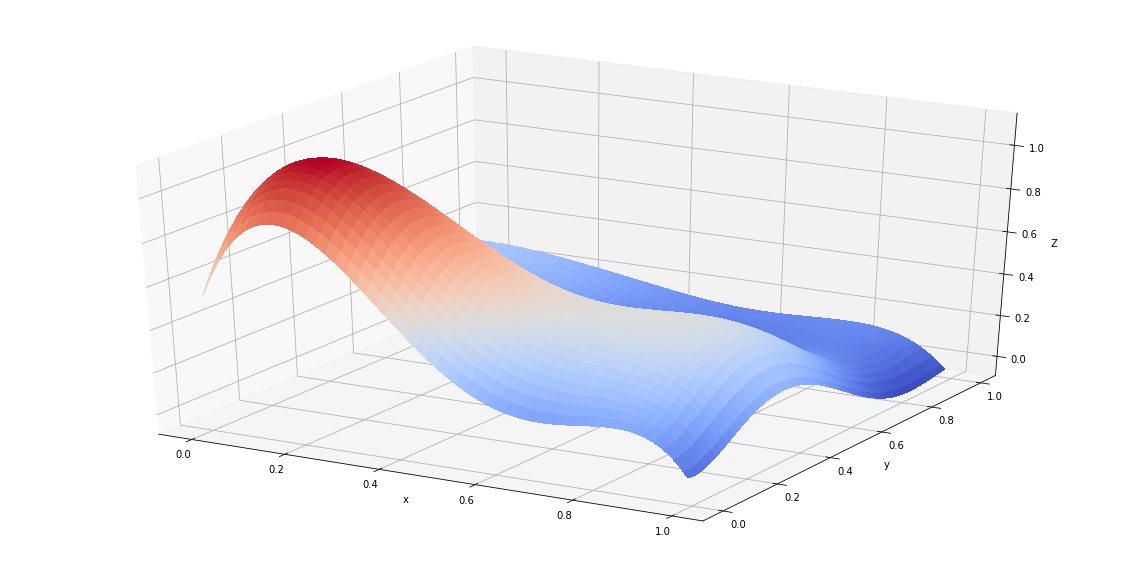

In [11]:

bias,var=computeBiasandVar(zPredictmatrix[:,:,0,2],zVector)
print('Bias^2 for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))
z_pred=np.mean(zPredictmatrix[:,:,0,2],1)
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
fig2=plotTheSurface(x,y,zPredictReshape)
fig2.show()
fig2.savefig('RidgeFranke.png',DPI=(200))

In [ ]:
XMatrix=constructX(xVector,yVector,3)

In [12]:
#Lasso Model
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error, r2_score

lambda_values=[1e-3,1e-2,1e-1,1,10,100]
numOfLambdas=len(lambda_values)
polynom_oders=[3,4,5]
numOfoders=len(polynom_oders)
statsMatrix=np.zeros((2,numberOfFolds,numOfLambdas,numOfoders))
zPredictmatrix=np.zeros((sizeVector,numberOfFolds,numOfLambdas,numOfoders))

for j,order in enumerate(polynom_oders):
    XMatrix=constructX(xVector,yVector,order)
    for i in range(numberOfFolds):
        #print(i)
        test1=folds[i]
        train1= trainSetindex(indeces,test1)
        for  h,lbd in enumerate(lambda_values):           
            #beta,XXinv=Ridgeregression(xVector[train1],yVector[train1],zVector[train1],order,lbd)
    #zPredict=computeZpredict(xVector[test1],yVector[test1],beta,3)
            
            lasso=Lasso(lbd,max_iter=1000)
            lasso.fit(XMatrix[train1,:],zVector[train1])
            zPredictmatrix[:,i,h,j]=lasso.predict(XMatrix)
            #zPredictmatrix[:,i,h,j]=computeZpredict(xVector,yVector,beta,order)
            statsMatrix[0,i,h,j]=mean_squared_error(zVector[test1],zPredictmatrix[test1,i,h,j])
            statsMatrix[1,i,h,j]=r2_score(zVector[test1],zPredictmatrix[test1,i,h,j])



In [13]:
for j,order in enumerate(polynom_oders):
    for  h,lbd in enumerate(lambda_values): 
        print(lbd)
        print('Average of MSE for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[0,:,h,j])))
        print('Average of R2score for polynom order {} is:'.format(str(order)) + str(np.mean(statsMatrix[1,:,h,j])))
        print('\n')

0.001
Average of MSE for polynom order 3 is:0.017996130118098135
Average of R2score for polynom order 3 is:0.7827609766818633


0.01
Average of MSE for polynom order 3 is:0.025332868809399656
Average of R2score for polynom order 3 is:0.694308153162029


0.1
Average of MSE for polynom order 3 is:0.08297474609689287
Average of R2score for polynom order 3 is:-0.0018027130284292482


1
Average of MSE for polynom order 3 is:0.08297474609689287
Average of R2score for polynom order 3 is:-0.0018027130284292482


10
Average of MSE for polynom order 3 is:0.08297474609689287
Average of R2score for polynom order 3 is:-0.0018027130284292482


100
Average of MSE for polynom order 3 is:0.08297474609689287
Average of R2score for polynom order 3 is:-0.0018027130284292482


0.001
Average of MSE for polynom order 4 is:0.01425264956370605
Average of R2score for polynom order 4 is:0.8279792736472578


0.01
Average of MSE for polynom order 4 is:0.025332868809399656
Average of R2score for polynom order 4 is:

Bias^2 for the final model is: 134.49476167373902
Var for the final model is: 1.406468002050762e-06


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


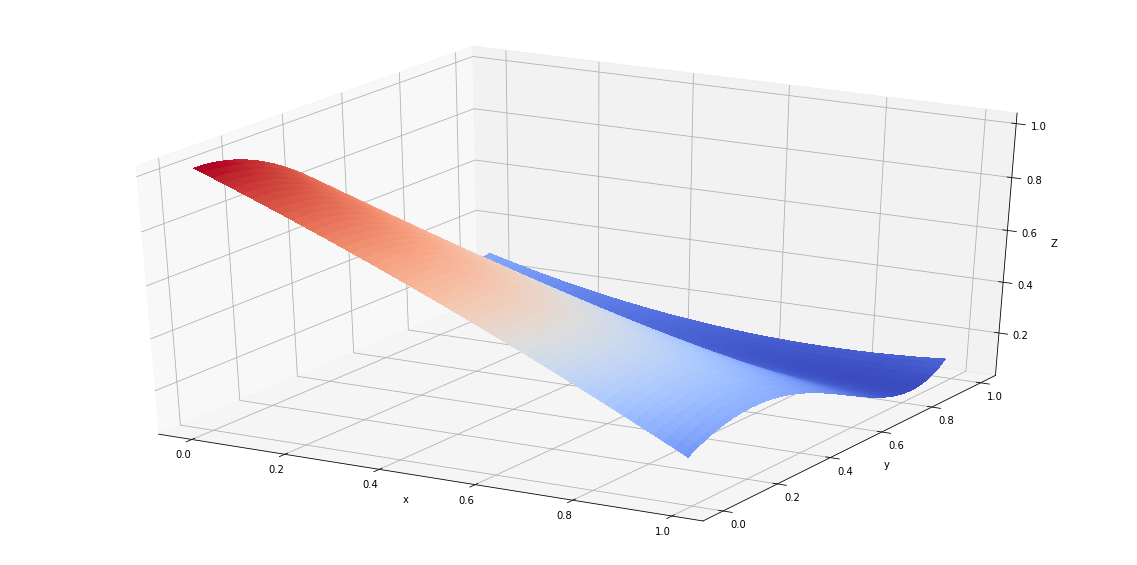

In [14]:
bias,var=computeBiasandVar(zPredictmatrix[:,:,0,2],zVector)
print('Bias^2 for the final model is: ' + str(bias))
print('Var for the final model is: ' + str(var))
z_pred=np.mean(zPredictmatrix[:,:,0,2],1)
matrixSize=np.size(y,0)
zPredictReshape=np.reshape(z_pred,(matrixSize,matrixSize))
fig2=plotTheSurface(x,y,zPredictReshape)
fig2.show()
fig2.savefig('LassoFranke.png')